# FIRST TRY #

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# READ IN CSV AND BEGIN CLEANING #

In [9]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
#allows scrolling through columns
pd.options.display.max_columns = 999

In [11]:
#sum of numeric columns with nulls
df._get_numeric_data().isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

# MODELING #

In [12]:
features = ['Overall Cond', '1st Flr SF']

X = df[features]
y = df['SalePrice']

SOME EDA

In [16]:
df['1st Flr SF'].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64

In [17]:
df._get_numeric_data().isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [18]:
#instantiate
lr = LinearRegression()

In [19]:
cross_val_score(lr,X,y).mean()

0.3809836080789209

SUPER LOW CROSS_VAL

In [21]:
# fit the model
lr.fit(X,y)

LinearRegression()

In [22]:
# train test spli
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

In [23]:
#train score
lr.score(X_train, y_train)

0.35929269644339346

In [24]:
#test score
lr.score(X_val, y_val)

0.4541257976534897

In [25]:
cross_val_score(lr,X_train,y_train).mean()

0.3513633814759766

TEST, TRAIN, and CROSS_VAL SCORES ARE VERY BAD

In [26]:
# make predictions
pred = lr.predict(X)
pred

array([126520.84901228, 150553.17013311, 167804.01275987, ...,
       182279.84245243, 186008.03130266, 164759.82182126])

In [27]:
#residuals 
residuals = y-pred
residuals

0        3979.150988
1       69446.829867
2      -58804.012760
3       44324.431043
4       -1115.675786
            ...     
2046    47515.907033
2047   -61629.292848
2048    -5279.842452
2049   -42008.031303
2050    24240.178179
Name: SalePrice, Length: 2051, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


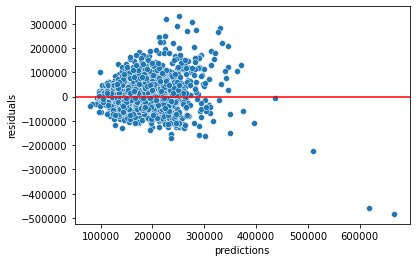

In [28]:
plt.axhline(y=0, color='r')
sns.scatterplot(pred, residuals)
plt.xlabel('predictions')
plt.ylabel('residuals');

CURIOUS ABOUT OUTLIERS ABOVE: PREDICTIONS OVER $500,000

<AxesSubplot:>

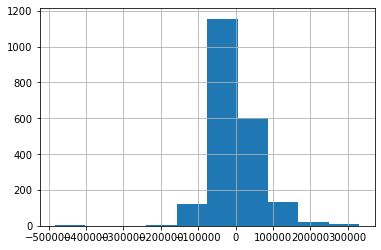

In [29]:
residuals.hist()

In [30]:
residuals.sort_values()

1885   -483331.147175
960    -457396.098216
616    -224434.261580
1023   -170016.750755
1656   -164276.178443
            ...      
1671    281852.946393
823     291459.278896
1692    307940.006198
138     318696.127361
1796    330956.690424
Name: SalePrice, Length: 2051, dtype: float64

# DID SOME MORE EDA #

SORTED RESIDUALS TO LOOK FOR THOSE OUTLIERS

In [32]:
df.loc[[1885]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [33]:
df.loc[[1023]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1023,1306,902207120,20,RM,103.0,12205,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,3,1,1949,1992,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,448.0,448.0,GasA,Gd,Y,SBrkr,1588,0,0,1588,0.0,0.0,2,0,5,1,TA,6,Maj2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2008,WD,65000


SINGLED OUT THESE ROWS AS OUTLIERS, PLANNING TO DROP THEM ON THE NEXT ROUND

In [34]:
X.loc[[1885, 1023, 960, 616]]

,Overall Cond,1st Flr SF
1885,5,5095
1023,1,1588
960,5,4692
616,7,3820


In [35]:
pred[1885]

667181.1471751488

In [44]:
#loaded df_test for kaggle submission. should have done this ealier. will do in next round
df_test = pd.read_csv('../datasets/test.csv')

In [45]:
#make preds on test
test_preds = lr.predict(df_test[features])

In [46]:
test_preds.shape

(878,)

In [47]:
#create target column 'SalePrice' in df_test
df_test['SalePrice'] = test_preds

In [48]:
#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

In [49]:
submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,149127.955612
2718,281029.399262
2414,119792.680826
1989,157078.477719
625,209974.035020


In [76]:
#submission.to_csv('../datasets/Kaggle Submissions/overallcond_1stsqft.csv')